In [1]:
# Uncomment if already installed
# !pip install matplotlib
# !pip install numpy
# !pip install pandas
# !pip install kaggle
# !pip install zipfile
# !pip install seaborn

### eSports Earnings Datasets
Money earned by Players & Teams from eSports Tournaments

#### In this project will answer:
1. Which games generate the highest earnings for players and teams?
2. How are earnings distributed among players? Is income concentrated among a few, or is it more equitable?
3. Is there a correlation between player earnings and team performance/structure?

In [2]:
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import zipfile
import seaborn as sns
import os

## Dataframes: Tratamento dos dados (se necessário)

In [3]:
df_countries = pd.read_csv(r'G:\00 - Aprendizado\Projetos\20250219__cs_datasets\country-and-continent-codes-list.csv')
df_players = pd.read_csv(r'G:\00 - Aprendizado\Projetos\20250219__cs_datasets\highest_earning_players.csv')
df_teams = pd.read_csv(r'G:\00 - Aprendizado\Projetos\20250219__cs_datasets\highest_earning_teams.csv')

In [4]:
df_countries.info()
df_countries.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Continent_Name             262 non-null    object 
 1   Continent_Code             219 non-null    object 
 2   Country_Name               262 non-null    object 
 3   Two_Letter_Country_Code    261 non-null    object 
 4   Three_Letter_Country_Code  258 non-null    object 
 5   Country_Number             258 non-null    float64
dtypes: float64(1), object(5)
memory usage: 12.4+ KB


Index(['Continent_Name', 'Continent_Code', 'Country_Name',
       'Two_Letter_Country_Code', 'Three_Letter_Country_Code',
       'Country_Number'],
      dtype='object')

In [5]:
df_countries = df_countries.rename(
    columns={
        'Continent_Name' : 'continent_name'
        ,'Continent_Code' : 'continent_code'
        ,'Country_Name' : 'country_name'
        ,'Two_Letter_Country_Code' : 'country_code' # key to merge
        ,'Three_Letter_Country_Code' : 'three_letter_country_code'
        ,'Country_Number' : 'country_number'
    }
)
df_countries.head()

,continent_name,continent_code,country_name,country_code,three_letter_country_code,country_number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0
1,Europe,EU,"Albania, Republic of",AL,ALB,8.0
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.0
4,Oceania,OC,American Samoa,AS,ASM,16.0


In [6]:
df_countries['country_name'] = df_countries['country_name'].str.split(',').str[0] # mantaining only country's name
df_countries.head()

,continent_name,continent_code,country_name,country_code,three_letter_country_code,country_number
0,Asia,AS,Afghanistan,AF,AFG,4.0
1,Europe,EU,Albania,AL,ALB,8.0
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0
3,Africa,AF,Algeria,DZ,DZA,12.0
4,Oceania,OC,American Samoa,AS,ASM,16.0


In [7]:
# checking duplicates
df_countries = df_countries[['continent_name', 'country_name', 'country_code']]
counts = df_countries.country_code.value_counts() # searching for duplicate values
print(counts)

country_code
AZ    2
AM    2
CY    2
KZ    2
GE    2
     ..
ZM    1
XX    1
XE    1
XD    1
XS    1
Name: count, Length: 253, dtype: int64


In [8]:
df_countries = df_countries.drop_duplicates() #removing duplicate values
df_countries.head(5)

,continent_name,country_name,country_code
0,Asia,Afghanistan,AF
1,Europe,Albania,AL
2,Antarctica,Antarctica (the territory South of 60 deg S),AQ
3,Africa,Algeria,DZ
4,Oceania,American Samoa,AS


In [9]:
df_players.info()
df_players.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PlayerId       1000 non-null   int64  
 1   NameFirst      1000 non-null   object 
 2   NameLast       1000 non-null   object 
 3   CurrentHandle  1000 non-null   object 
 4   CountryCode    1000 non-null   object 
 5   TotalUSDPrize  1000 non-null   float64
 6   Game           1000 non-null   object 
 7   Genre          1000 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
0,3883,Peter,Rasmussen,dupreeh,dk,1822989.41,Counter-Strike: Global Offensive,First-Person Shooter
1,3679,Andreas,Højsleth,Xyp9x,dk,1799288.57,Counter-Strike: Global Offensive,First-Person Shooter
2,3885,Nicolai,Reedtz,dev1ce,dk,1787489.88,Counter-Strike: Global Offensive,First-Person Shooter
3,3672,Lukas,Rossander,gla1ve,dk,1652350.75,Counter-Strike: Global Offensive,First-Person Shooter
4,17800,Emil,Reif,Magisk,dk,1416448.64,Counter-Strike: Global Offensive,First-Person Shooter


In [10]:
df_players = df_players.rename(
    columns={
       'PlayerId': 'playerid'
       ,'NameFirst': 'namefirst'
       ,'NameLast': 'namelast'
       ,'CurrentHandle': 'currenthandle'
       ,'CountryCode': 'country_code'
       ,'TotalUSDPrize': 'totalusdprize'
       ,'Game': 'game'
       ,'Genre': 'genre'
       }
)
df_players['country_code'] = df_players['country_code'].str.upper() # CAPS the countries codes to merge
df_players.head(5)

,playerid,namefirst,namelast,currenthandle,country_code,totalusdprize,game,genre
0,3883,Peter,Rasmussen,dupreeh,DK,1822989.41,Counter-Strike: Global Offensive,First-Person Shooter
1,3679,Andreas,Højsleth,Xyp9x,DK,1799288.57,Counter-Strike: Global Offensive,First-Person Shooter
2,3885,Nicolai,Reedtz,dev1ce,DK,1787489.88,Counter-Strike: Global Offensive,First-Person Shooter
3,3672,Lukas,Rossander,gla1ve,DK,1652350.75,Counter-Strike: Global Offensive,First-Person Shooter
4,17800,Emil,Reif,Magisk,DK,1416448.64,Counter-Strike: Global Offensive,First-Person Shooter


In [11]:
df_players = df_players.merge(df_countries, on='country_code', how='left')
df_players.head(5)

,playerid,namefirst,namelast,currenthandle,country_code,totalusdprize,game,genre,continent_name,country_name
0,3883,Peter,Rasmussen,dupreeh,DK,1822989.41,Counter-Strike: Global Offensive,First-Person Shooter,Europe,Denmark
1,3679,Andreas,Højsleth,Xyp9x,DK,1799288.57,Counter-Strike: Global Offensive,First-Person Shooter,Europe,Denmark
2,3885,Nicolai,Reedtz,dev1ce,DK,1787489.88,Counter-Strike: Global Offensive,First-Person Shooter,Europe,Denmark
3,3672,Lukas,Rossander,gla1ve,DK,1652350.75,Counter-Strike: Global Offensive,First-Person Shooter,Europe,Denmark
4,17800,Emil,Reif,Magisk,DK,1416448.64,Counter-Strike: Global Offensive,First-Person Shooter,Europe,Denmark


In [12]:
df_teams.info()
df_teams.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TeamId            928 non-null    int64  
 1   TeamName          928 non-null    object 
 2   TotalUSDPrize     928 non-null    float64
 3   TotalTournaments  928 non-null    int64  
 4   Game              928 non-null    object 
 5   Genre             928 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 43.6+ KB


,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre
0,760,San Francisco Shock,3105000.0,7,Overwatch,First-Person Shooter
1,776,London Spitfire,1591136.5,13,Overwatch,First-Person Shooter
2,768,New York Excelsior,1572618.5,18,Overwatch,First-Person Shooter
3,773,Philadelphia Fusion,1186278.5,15,Overwatch,First-Person Shooter
4,766,Seoul Dynasty,1130000.0,6,Overwatch,First-Person Shooter


### Which games generate the highest earnings for players and teams?

In [14]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   playerid        1032 non-null   int64  
 1   namefirst       1032 non-null   object 
 2   namelast        1032 non-null   object 
 3   currenthandle   1032 non-null   object 
 4   country_code    1032 non-null   object 
 5   totalusdprize   1032 non-null   float64
 6   game            1032 non-null   object 
 7   genre           1032 non-null   object 
 8   continent_name  1032 non-null   object 
 9   country_name    1032 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 80.8+ KB


In [16]:
# Supondo que o DataFrame já foi carregado e está na variável df
# Agrupa os dados por jogo e soma os prêmios em USD
df_game_totals = df_players.groupby('game')['totalusdprize'].sum().reset_index()

# Ordena os jogos pelo total de prêmios de forma decrescente
df_game_totals = df_game_totals.sort_values(by='totalusdprize', ascending=False)

# Exibe os resultados
print(df_game_totals)

                               game  totalusdprize
2                            Dota 2   1.857838e+08
1  Counter-Strike: Global Offensive   6.084354e+07
3                          Fortnite   4.396542e+07
6                 League of Legends   3.504348e+07
9                      Starcraft II   2.537982e+07
4                       Hearthstone   1.420638e+07
8                              PUBG   1.330559e+07
7                         Overwatch   1.241176e+07
5               Heroes of the Storm   1.178045e+07
0                    Arena of Valor   8.333952e+06


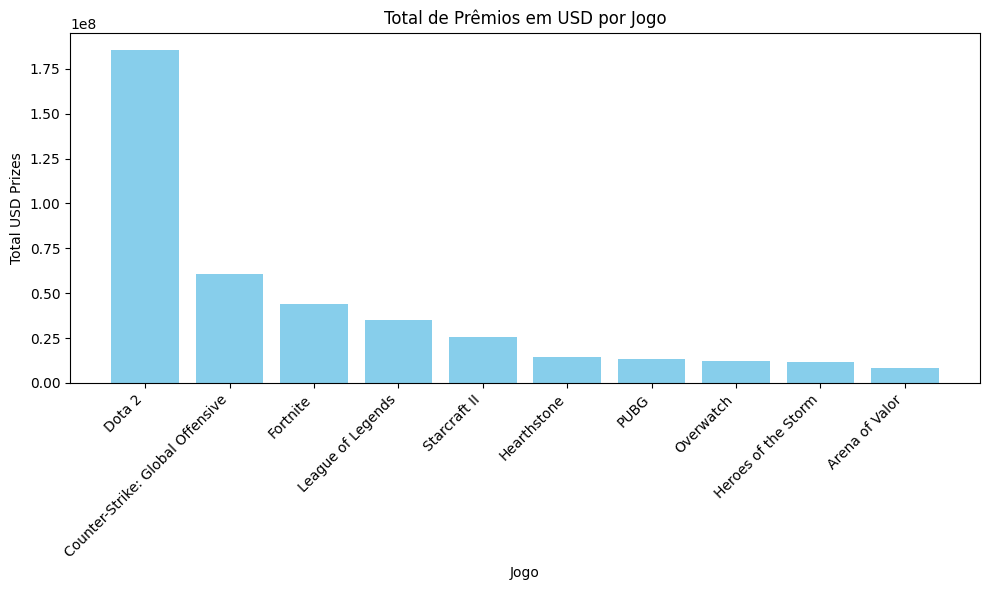

In [17]:
plt.figure(figsize=(10, 6))
plt.bar(df_game_totals['game'], df_game_totals['totalusdprize'], color='skyblue')
plt.xlabel('Jogo')
plt.ylabel('Total USD Prizes')
plt.title('Total de Prêmios em USD por Jogo')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Ajusta layout para não cortar os labels
plt.show()

### How are earnings distributed among players? Is income concentrated among a few, or is it more equitable?

Descriptive statistics:
count    9.280000e+02
mean     5.399183e+05
std      1.902399e+06
min      1.750000e+02
25%      3.915000e+04
50%      1.165306e+05
75%      3.231491e+05
max      3.381064e+07
Name: TotalUSDPrize, dtype: float64


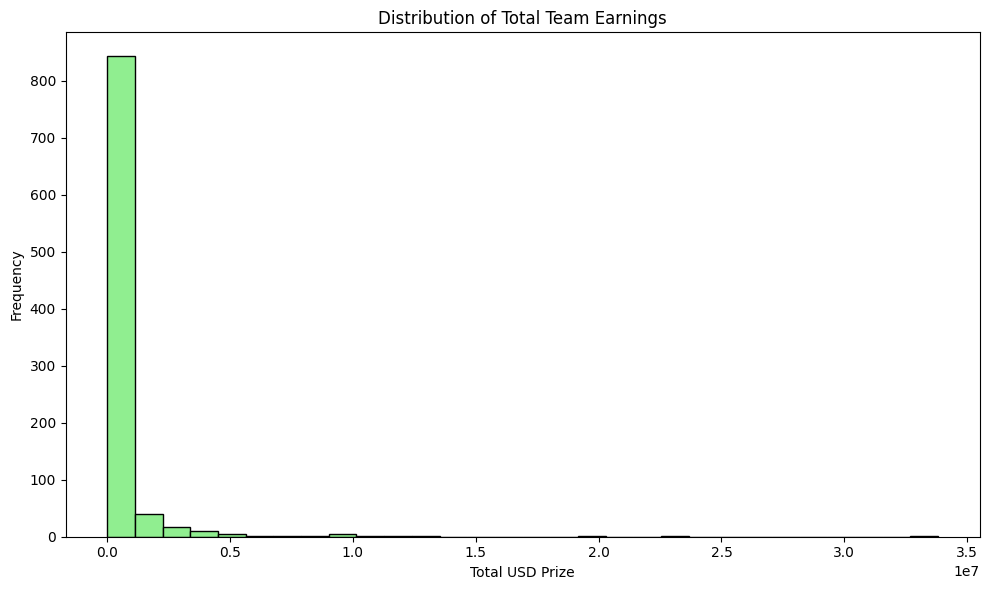

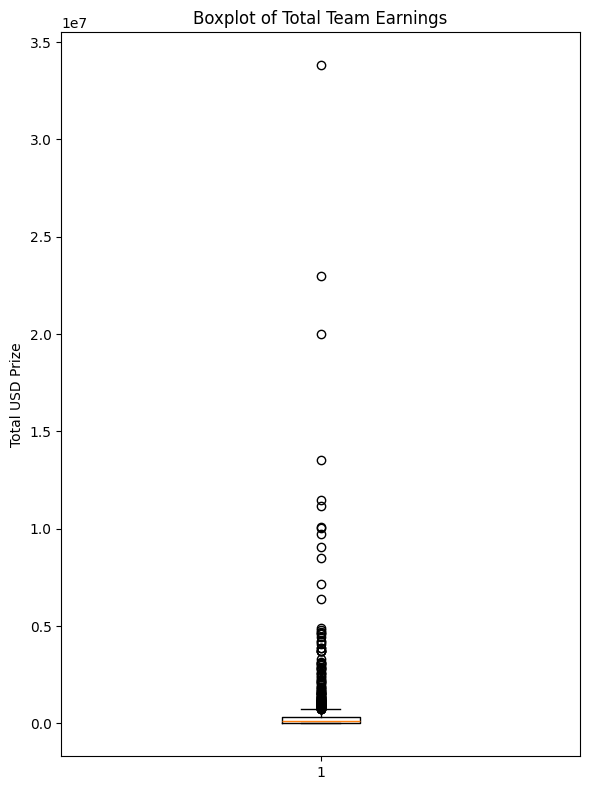

In [22]:
# Descriptive statistics to understand the distribution
stats = df_teams['TotalUSDPrize'].describe()
print("Descriptive statistics:")
print(stats)

# Histogram to visualize the distribution of earnings
plt.figure(figsize=(10, 6))
plt.hist(df_teams['TotalUSDPrize'], bins=30, color='lightgreen', edgecolor='black')
plt.xlabel('Total USD Prize')
plt.ylabel('Frequency')
plt.title('Distribution of Total Team Earnings')
plt.tight_layout()
plt.show()

# Boxplot to identify median, quartiles, and outliers
plt.figure(figsize=(6, 8))
plt.boxplot(df_teams['TotalUSDPrize'], vert=True)
plt.ylabel('Total USD Prize')
plt.title('Boxplot of Total Team Earnings')
plt.tight_layout()
plt.show()


- Most teams are concentrated in low prize values—this is why you see that large bar on the left (near 0). The majority of teams have relatively small total earnings.

- There are few teams with very high earnings: notice that the horizontal axis (Total USD Prize) goes up to about 3.5 × 10^7 (35 million), but there are hardly any bars in the range above 1 × 10^7 (10 million). This indicates that very few teams reach total prizes in that range, forming a "long tail" on the right side.

- The distribution is highly skewed: the chart is typical of data where only a few observations (few teams) have extremely high values while the majority are well below that. In other words, prize money is concentrated in a few elite teams.

### Is there a correlation between player earnings and team performance/structure?

In [ ]:
# Top 5 teams
top5_teams = df_teams.nlargest(5, 'TotalUSDPrize')

# Bottom 5 teams
bottom5_teams = df_teams.nsmallest(5, 'TotalUSDPrize')

print("Top 5:")
print(top5_teams[['TeamName', 'TotalUSDPrize', 'Game', 'Genre']])

print("\nBottom 5:")
print(bottom5_teams[['TeamName', 'TotalUSDPrize', 'Game', 'Genre']])


Top 5:
          TeamName  TotalUSDPrize    Game                            Genre
500             OG    33810636.13  Dota 2  Multiplayer Online Battle Arena
501    Team Liquid    22967431.10  Dota 2  Multiplayer Online Battle Arena
502  Evil Geniuses    19988670.62  Dota 2  Multiplayer Online Battle Arena
503         Newbee    13523736.43  Dota 2  Multiplayer Online Battle Arena
504    Team Secret    11492345.09  Dota 2  Multiplayer Online Battle Arena

Bottom 5:
                 TeamName  TotalUSDPrize         Game                  Genre
879             Team Acer         175.00  Hearthstone  Collectible Card Game
878                 3DMAX         300.00  Hearthstone  Collectible Card Game
877  Star Horn Royal Club         306.00  Hearthstone  Collectible Card Game
876           mousesports         416.84  Hearthstone  Collectible Card Game
875            TCM Gaming         500.00  Hearthstone  Collectible Card Game


In [24]:
players_by_game = df_players.groupby('game')['totalusdprize'].sum().reset_index()
players_by_game.rename(columns={'totalusdprize': 'players_total_prize'}, inplace=True)

teams_by_game = df_teams.groupby('Game')['TotalUSDPrize'].sum().reset_index()
teams_by_game.rename(columns={'TotalUSDPrize': 'teams_total_prize'}, inplace=True)

merged = pd.merge(players_by_game, teams_by_game, left_on='game', right_on='Game', how='inner')

merged.drop(columns=['Game'], inplace=True)

correlation = merged['players_total_prize'].corr(merged['teams_total_prize'])
print("Correlação de Pearson:", correlation)

print(merged)


Correlação de Pearson: 0.985792769226626
                               game  players_total_prize  teams_total_prize
0                    Arena of Valor         8.333952e+06       9.969149e+06
1  Counter-Strike: Global Offensive         6.084354e+07       8.485393e+07
2                            Dota 2         1.857838e+08       2.202828e+08
3                          Fortnite         4.396542e+07       3.466133e+07
4                       Hearthstone         1.420638e+07       1.086453e+07
5               Heroes of the Storm         1.178045e+07       1.071052e+07
6                 League of Legends         3.504348e+07       6.466556e+07
7                         Overwatch         1.241176e+07       2.046527e+07
8                              PUBG         1.330559e+07       1.671500e+07
9                      Starcraft II         2.537982e+07       2.785615e+07


If the value is close to 1, it indicates a strong positive correlation; that is, games with high individual earnings tend to have high team earnings.

Values near 0 indicate little or no linear correlation, while negative values indicate an inverse relationship (which is less common in this context).